# analysis
> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
from pymongo import MongoClient
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [ ]:
MONGO_HOST = 'mongodb://localhost:27017'

In [ ]:
client = MongoClient(MONGO_HOST)

In [ ]:
# create or load pubmed database
db = client.PubMed

In [ ]:
db.list_collection_names()

['pubmed_meta']

In [ ]:
pubmed = db.pubmed_meta

In [ ]:
pubmed.estimated_document_count()

317452

In [ ]:
docs = [doc for doc in tqdm(pubmed.find())]

In [ ]:
docs[0]

{'_id': ObjectId('5e551f792bff2f39cf577b89'),
 'title': 'Anatomoelectroclinical features of SEEG-confirmed pure insular-onset epilepsy.  - PubMed - NCBI\n',
 'authors': 'Peltola ME1, Trébuchon A2, Lagarde S2, Scavarda D3, Carron R4, Metsähonkala L5, Lauronen L6, Lépine A7, Villeneuve N7, Bartolomei F2.',
 'organizations': ['Epilepsia Helsinki, HUS Medical Imaging Center, Clinical Neurophysiology, Helsinki University Hospital, University of Helsinki, Helsinki, Finland. Electronic address: maria.peltola@hus.fi.',
  'Aix Marseille Univ, APHM, INSERM, INS, Inst Neurosci Syst, Timone Hospital, Epileptology Department, Marseille, France.',
  'Aix Marseille Univ, APHM, INSERM, INS, Inst Neurosci Syst, Timone Hospital, Pediatric Neurosurgery Department, Marseille, France.',
  'Aix Marseille Univ, APHM, INSERM, INS, Inst Neurosci Syst, Timone Hospital, Functional and Stereotactic Neurosurgery Department, Marseille, France.',
  'Epilepsia Helsinki, Department of Pediatric Neurology, Helsinki Uni

In [ ]:
df = pd.DataFrame(docs)

Filter out `magnetic resonance`

In [ ]:
df = df[df['keyword'] != 'magnetic resonance']

### Authors

In [ ]:
paper_authors = df['authors'].apply(lambda x: x.split(', '))

In [ ]:
len(paper_authors)

268494

In [ ]:
_authors = paper_authors.explode(); len(_authors)

1249936

In [ ]:
_authors = _authors[(_authors.str.len() > 3) & 
                    (_authors != '[No authors listed]')]; len(_authors)

1249297

In [ ]:
Counter(_authors).most_common(10)

[('Zhang Y1', 290),
 ('Wang Y', 288),
 ('Wang Y1', 277),
 ('Pascual-Leone A.', 266),
 ('Hallett M.', 241),
 ('Rothwell JC.', 223),
 ('Zhang Y', 222),
 ('Wang J1', 215),
 ('Rothwell JC', 214),
 ('et al.', 213)]

In [ ]:
authors = set(_authors)

In [ ]:
len(authors)

675108

### Organizations

In [ ]:
_orgs = df['organizations'].explode(); len(_orgs)

491210

In [ ]:
_orgs

0         Epilepsia Helsinki, HUS Medical Imaging Center...
0         Aix Marseille Univ, APHM, INSERM, INS, Inst Ne...
0         Aix Marseille Univ, APHM, INSERM, INS, Inst Ne...
0         Aix Marseille Univ, APHM, INSERM, INS, Inst Ne...
0         Epilepsia Helsinki, Department of Pediatric Ne...
                                ...                        
268489                                      ORGANIZATION_NA
268490                                      ORGANIZATION_NA
268491                                      ORGANIZATION_NA
268492    University of Alabama, Center for Development ...
268493                                      ORGANIZATION_NA
Name: organizations, Length: 491210, dtype: object

In [ ]:
orgs_common = Counter(_orgs).most_common(100);

In [ ]:
x, height = zip(*orgs_common[2:])

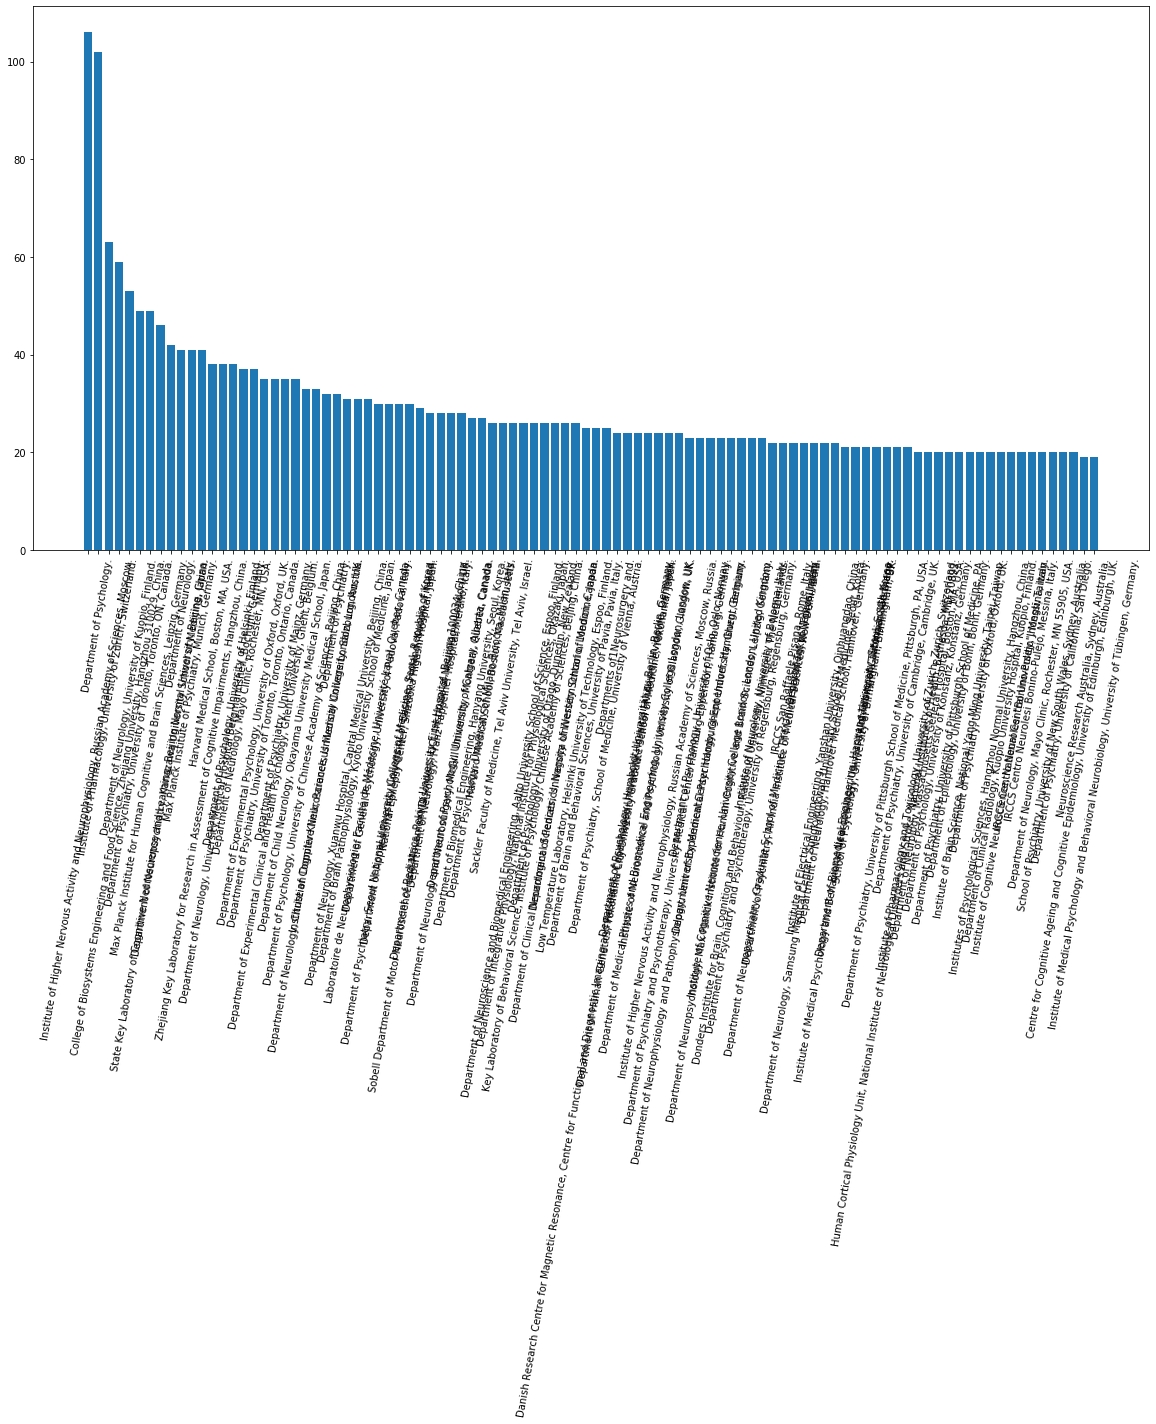

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(x, height)
plt.xticks(rotation=80);

In [ ]:
# orgs_common

In [ ]:
orgs = set(_orgs); len(orgs)

357770

### Citations => year

In [ ]:
ym_pat = re.compile(r'(([0-9])\d{3}\s([A-Z])\w{2})')
y_pat = re.compile(r'(([0-9])\d{3})')

In [ ]:
for c in df['citation'][:1]:
    print(c)
    print(y_pat.search(c).group(0))

Epilepsy Behav. 2020 Feb 21;105:106964. doi: 10.1016/j.yebeh.2020.106964. [Epub ahead of print]
2020


### Yearly growth

In [ ]:
authors = df['authors'].apply(lambda x: x.split(', ')); len(authors)

268494

In [ ]:
def parse_year(cit, match='y'):
    if isinstance(cit, str): 
        if match == 'ym':
            ym = ym_pat.search(cit)
            if ym: return ym.group(0)
        if match == 'y':
            y = y_pat.search(cit)
            if y:
                y = int(y.group(0))
                if y > 1900:
                    return y
    return False

In [ ]:
years = df['citation'].apply(parse_year)

In [ ]:
years_count = Counter(years).most_common()

In [ ]:
years_count[:50]

[(2018, 15388),
 (2019, 14145),
 (2017, 13990),
 (2016, 13493),
 (2015, 13090),
 (2014, 12032),
 (2013, 11562),
 (2012, 10092),
 (2011, 9521),
 (2010, 8341),
 (2009, 8035),
 (2008, 7330),
 (2007, 6900),
 (2006, 6693),
 (2005, 5848),
 (2004, 5238),
 (2003, 4852),
 (2002, 4289),
 (2001, 4124),
 (2000, 3973),
 (1999, 3745),
 (1998, 3349),
 (1997, 3227),
 (1996, 3005),
 (1994, 2837),
 (1995, 2810),
 (1992, 2766),
 (2020, 2738),
 (1969, 2709),
 (1991, 2662),
 (1993, 2630),
 (1990, 2397),
 (1970, 2372),
 (1971, 2315),
 (1985, 2284),
 (1968, 2267),
 (1972, 2174),
 (1967, 2154),
 (1973, 2149),
 (1989, 2022),
 (1974, 1987),
 (1984, 1916),
 (1986, 1903),
 (1988, 1862),
 (1987, 1811),
 (1979, 1739),
 (1980, 1718),
 (1983, 1713),
 (1964, 1695),
 (1978, 1652)]

In [ ]:
x, height = zip(*years_count[:20])

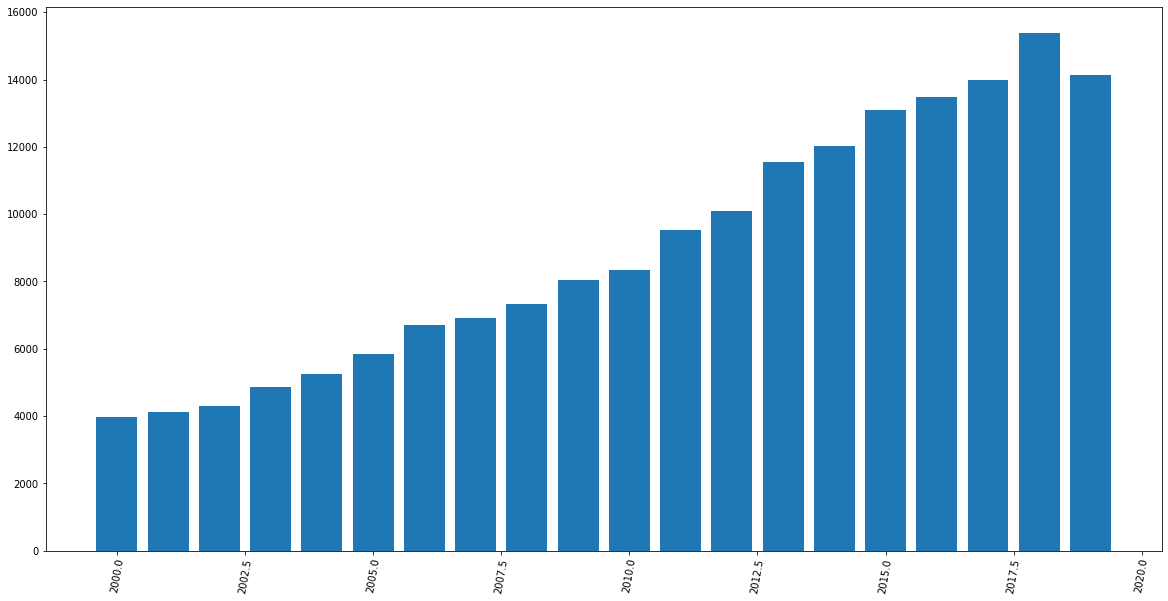

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(x, height)
plt.xticks(rotation=80);

In [ ]:
len(authors)

268494

In [ ]:
len(years)

268494

In [ ]:
# researchers = pd.DataFrame([authors, years])

In [ ]:
years

0         2020
1         2020
2         2020
3         2020
4         2019
          ... 
268489    1976
268490    1976
268491    1975
268492    1975
268493    1975
Name: citation, Length: 268494, dtype: object

In [ ]:
authors

0         [Peltola ME1, Trébuchon A2, Lagarde S2, Scavar...
1                       [Kim H1, Yoshimura N2,3, Koike Y2.]
2         [Ghorbani J1, Adimi Naghan P2, Safavi Naeini A...
3         [Koshiyama D1, Kirihara K1, Usui K1, Tada M2, ...
4         [MacDonald HJ1,2, Brittain JS2,3, Spitzer B4, ...
                                ...                        
268489                                [[No authors listed]]
268490                                           [Bond MR.]
268491                                 [Milne HB, Butt TW.]
268492                             [Goldman R1, Fristoe M.]
268493                                    [Levy R, Post F.]
Name: authors, Length: 268494, dtype: object

In [ ]:
df['citation'] = df['citation'].apply(parse_year)

In [ ]:
df['authors'] = df['authors'].apply(lambda x: x.split(', '))

In [ ]:
last_10 = df[df['citation'] > 2009]

In [ ]:
len(last_10)

124392

In [ ]:
researchers = []
for y in range(2010, 2021):
    rs = last_10[last_10['citation'] == y]['authors']
    rs = len(set(rs.explode()))
    researchers.append((y, rs))

In [ ]:
researchers

[(2010, 33486),
 (2011, 38192),
 (2012, 41785),
 (2013, 47917),
 (2014, 56587),
 (2015, 63275),
 (2016, 67799),
 (2017, 72809),
 (2018, 79576),
 (2019, 76369),
 (2020, 16104)]

In [ ]:
y, n = zip(*researchers)

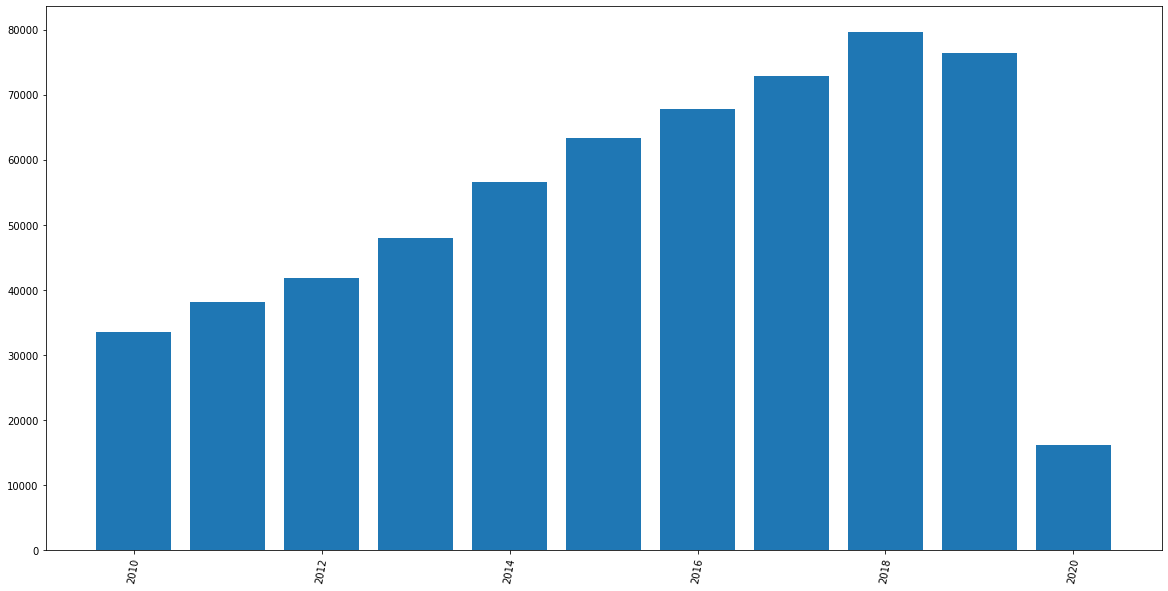

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(y, n)
plt.xticks(rotation=80);